# Интернет-магазин компьютерных игр "Стримчик"

**Цель:**
- выявить определяющие успешность игры закономерности, потенциально популярные продукты для планирования рекламных компаний.

**Задачи:**
- провести исследовательский анализ данных (изучить выпуск игр и продажи по годам, платформам, жанрам);
- изучить портреты пользователей в разных регионах (по топовым платформам, жанрам, влиянию рейтинга ESRB на продажи);
- проверить гипотезы;
- cформулировать основные выводы.

**Описание данных:**

Исторические данные из открытых источников до 2016 года.
- `Name` — название игры,
- `Platform` — платформа,
- `Year_of_Release` — год выпуска,
- `Genre` — жанр игры,
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий),
- `EU_sales` — продажи в Европе (миллионы проданных копий),
- `JP_sales` — продажи в Японии (миллионы проданных копий),
- `Other_sales` — продажи в других странах (миллионы проданных копий),
- `Critic_Score` — оценка критиков (максимум 100),
- `User_Score` — оценка пользователей (максимум 10),
- `Rating` — рейтинг от организации ESRB (возрастная категория).

## Загрузка данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Прочитаем файл:

In [2]:
df = pd.read_csv('games.csv')

## Подготовка данных

**Этапы:**
- Изучить общую информацию о датасете;
- Исправить стиль заголовков;
- Обработать пропуски;
- Изменить тип данных, где это необходимо;
- Проверить данные на наличие дубликатов и обработать их;
- Добавить в таблицу столбец с суммарными продажами во всех регионах.

### Общая информация о датасете

Выведем на экран первые 5 строк таблицы:

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- В датафрейме представлены данные об играх. В таблице 16715 строк и 11 столбцов. Данных достаточно для анализа.
- В названиях колонок нарушения стиля: строчные буквы сочетаются с прописными.
- Типы данных - float64, object. В столбце Year_of_Release данные необходимо привести к целочисленным значениям. В столбце User_Score - к вещественным значениям.
- В датасете встречаются пропуски.

Посмотрим процент пропусков:

In [5]:
(df.isna().mean()*100).round(1)

Name                0.0
Platform            0.0
Year_of_Release     1.6
Genre               0.0
NA_sales            0.0
EU_sales            0.0
JP_sales            0.0
Other_sales         0.0
Critic_Score       51.3
User_Score         40.1
Rating             40.5
dtype: float64

- В столбце `Year_of_Release` пропусков 1,6 %.
- В столбцах с названиями игр и жанров - по 2 пропуска.
- В столбцах с оценками и возрастным рейтингом пропуски достигают 40-50 % от всех данных.

- В столбце с оценками пользователей видим аббревиатуру `tbd` - "подлежит определению". Заменим в дальнейшем это значение на "NaN" и приведем значения к типу данных "float64".

### Стиль заголовков

Приведем названия столбцов к нижнему регистру в соответствии с хорошим стилем. Проверим результат:

In [6]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков и изменение типов данных

Пропуски в столбце `year_of_release` вероятно появились случайно при объединении данных из нескольких источников или копировании. Строки с пропусками в данном столбце удалим, так как они составляют лишь 1,6 % от общего объема данных. Потеря такого объема данных не повлияет на результаты исследования. После приведем значения в столбце к целочисленным.

In [7]:
# удалим с троки с пропусками в столбце с годами выпуска игр:
df = df.dropna(subset = ['year_of_release'])

# приведем данные в столбце к типу данных int64:
df['year_of_release'] = df['year_of_release'].astype('int')

Так как пропусков в названиях игр и жанров по два, проверим: возможно они находятся в одних и тех же строках:

In [8]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, пропуски в названиях игр и жанров находятся в одних и тех же строках. Причина их появления скорее всего также случайна. В дальнейшем исследовании названия игр не имеют особого значения, а вот без названий жанров нам не обойтись. Поэтому удалим строки с пропусками в названиях жанров:

In [9]:
df = df.dropna(subset = ['genre'])

Пропуски в столбцах с оценками критиков и пользователей возможно объясняются фактом недавнего выпуска игр. Проверим эту зависимость, построив графики:

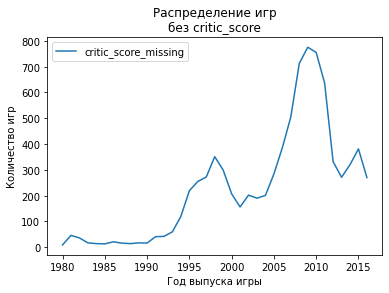

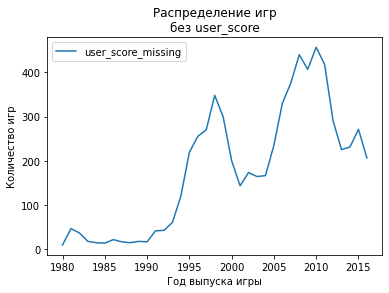

In [10]:
# добавим столбец, в котором определяем пропущена ли оценка в critic_score или нет:
df['critic_score_missing'] = df['critic_score'].isna().astype('int')

# посчитаем количество пропусков по данным, сгруппированным по году выпуска игры
# и построим график, показывающий количество пропусков в critic_score:
df.groupby('year_of_release').agg({'critic_score_missing':'sum'}).plot()
plt.title('Распределение игр\nбез critic_score')
plt.xlabel('Год выпуска игры'), plt.ylabel('Количество игр')
plt.show()

# добавим столбец, в котором определяем пропущена ли оценка в user_score или нет:
df['user_score_missing'] = df['user_score'].isna().astype('int')

# посчитаем количество пропусков по данным, сгруппированным по году выпуска игры
# и построим график, показывающий количество пропусков в user_score:
df.groupby('year_of_release').agg({'user_score_missing':'sum'}).plot()
plt.title('Распределение игр\nбез user_score')
plt.xlabel('Год выпуска игры'), plt.ylabel('Количество игр')
plt.show()

У более поздних игр наблюдается тенденция к увеличению пропусков в оценках как критиков, так и пользователей. Это в некоторой степени подтверждает догадку о том, что отсутствие оценок связано с годом релиза игр. Однако зависимость эта не строго прямолинейная, на графике мы видим несколько пиков и провалов. Значимые пики пропусков оценок в том числе наблюдаются в довольно ранних играх. Возможно увеличение пропусков с годами объясняется тем, что игр с каждым годом выпускалось все больше. Целесообразнее пропуски в этих столбцах оставить, как есть.

Изучим числовое описание данных в столбцах с оценками:

In [11]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [12]:
df['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

- По оценкам критиков видим, что минимальная оценка равна 13, максимальная - 98. И среднее арифметическое, и медиана находятся в районе 70. Скорее всего выбросов данных в данном столбце нет.
- В столбце с оценками пользователей видим аббревиатуру "tbd" - "подлежит определению". Заменим это значение на "NaN" и приведем значения к типу данных "float64":

In [13]:
# заменим пропуски в "tbd" на "NaN":
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'Nan'

# приведем данные в столбце с оценками пользователей в тип данных float64:
df['user_score'] = df['user_score'].astype('float')

# посмотрим числовое описание данных:
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Заменим пропуски в столбце `rating` на значение "нет_рейтинга":

In [14]:
df.loc[df['rating'].isna(), 'rating'] = 'нет_рейтинга'

Проверим наличие/отсутствие пропусков и типы данных в датасете:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  16444 non-null  object 
 1   platform              16444 non-null  object 
 2   year_of_release       16444 non-null  int32  
 3   genre                 16444 non-null  object 
 4   na_sales              16444 non-null  float64
 5   eu_sales              16444 non-null  float64
 6   jp_sales              16444 non-null  float64
 7   other_sales           16444 non-null  float64
 8   critic_score          7983 non-null   float64
 9   user_score            7463 non-null   float64
 10  rating                16444 non-null  object 
 11  critic_score_missing  16444 non-null  int32  
 12  user_score_missing    16444 non-null  int32  
dtypes: float64(6), int32(3), object(4)
memory usage: 1.6+ MB


- Пропусков в значимых для нас столбцах нет. Значения находятся в необходимых нам типах данных.

Проверим наличие явных дубликатов в таблице:

In [16]:
df.duplicated().sum()

0

- Явных дубликатов не обнаружено.

### Расчёты и добавление результатов в таблицу

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,critic_score_missing,user_score_missing,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет_рейтинга,1,1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет_рейтинга,1,1,31.38


- Столбец с суммарными продажами добавлен.

**Выводы:**

На этапе предобработки данных мы исправили обнаруженные в них ошибки и недочеты, сделали дополнительные расчеты.
1. Привели названия столбцов к нижнему регистру в соответствии с хорошим стилем.
2. Обработали пропуски в данных, а также исправили типы данных в некоторых столбцах.
    - Строки с пропусками в столбце year_of_release  (год выпуска игры) удалили без риска исказить результаты исследования, так как пропуски составляли лишь 1,6 % от общего объема данных. Значения в столбце привели к типу данных `int`.
    - Убедились, что пропуски в названиях игр и жанров (по два пропуска в каждом столбце) находились в одних и тех же строках. Без названий жанров в дальнейшем исследовании нам не обойтись. Поэтому строки с пропусками в названиях жанров мы удалили.
    - Проверив на графиках зависимость количества пропусков в столбцах с оценками критиков и пользователей от года выпуска игры, обнаружили тенденцию к увеличению пропусков в оценках у более поздних игр. Возможно это связано с увеличением количества выпускаемых игр и оценок просто нет, в связи с чем пропуски в этих столбцах оставили без изменений.
    - В столбце с оценками пользователей аббревиатуру `tbd` - "подлежит определению" (видимо оценок тоже нет) - заменили на "NaN" и привели значения к типу данных "float64".
    - В столбце с возрастными рейтингами пропуски заменили на значение "нет_рейтинга".
3. Добавили столбец с суммарными продажами во всех регионах.

## Исследовательский анализ данных

**Этапы:**
- Изучить, сколько игр выпускалось в разные годы. Определить, важны ли данные за все периоды.
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Определить, за какой характерный срок появляются новые и исчезают старые платформы.
- Взять данные за актуальный период для построения прогноза на 2017 год.
- Изучить, какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. 
- Посмотреть на общее распределение игр по жанрам. Выделить самые прибыльные жанры.

### Количество игр по годам

Изучим, за какие года представлены данные в датасете. Это пригодится нам для определения количества корзин в гистограмме.

In [18]:
df['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

Данные представлены с 1980 по 2016 годы. Построим барплот, отображающий распределение количества игр в зависимости от года выпуска.

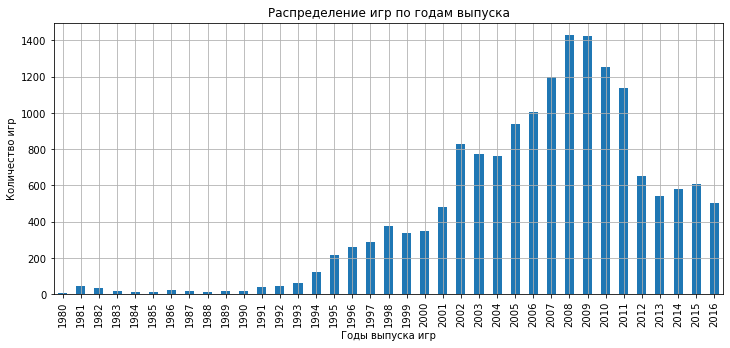

In [19]:
# сгруппируем данные по годам выпуска игр и построим график распределения количества игр по годам:
(
    df.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(12,5), legend=False)
)
plt.title('Распределение игр по годам выпуска')
plt.xlabel('Годы выпуска игр'), plt.ylabel('Количество игр')
plt.show()

- На графике видим, что вплоть до 1995 года игр выпускалось очень мало, их количество не достигало 100 в год. С 1995 года наблюдается рост производства игр, после 2000 года довольно интенсивный, с максимумом более 1400 игр в 2008-2009 годах. Затем отмечается снижение показателя, и к 2016 году количество выпущенных игр достигает отметки около 500.
- Данные до 1995 года не важны для дальнейшего исследования.

### Продажи по платформам

Посмотрим, как менялись продажи по платформам с течением времени. Для этого построим график.

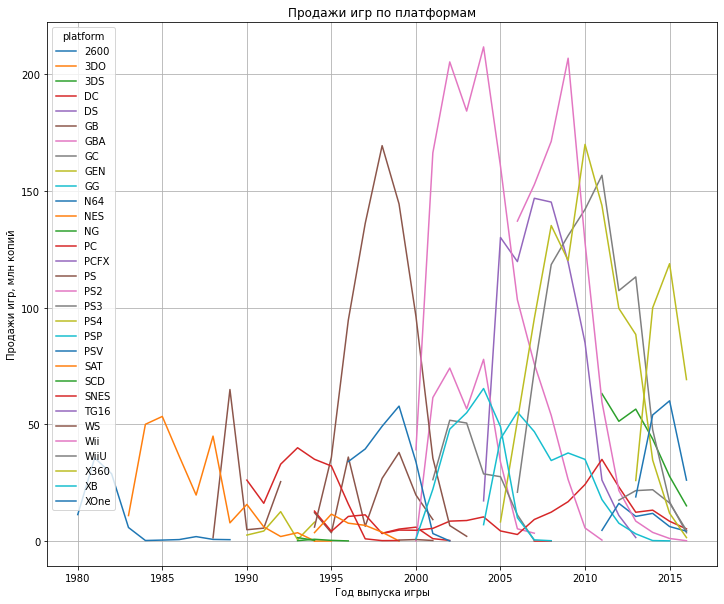

In [20]:
df.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 10))
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска игры'), plt.ylabel('Продажи игр, млн копий')
plt.show()

- По графику видим, что продажи по платформам до 1995 года были сравнительно небольшие. С 1995 года наблюдаем на некоторых платформах резкий скачок продаж, в то время как на других платформах продажи остаются сравнительно небольшими.
- По графику также отметим, что все платформы имеют определенный "срок жизни": они появляются, достигают своего максимума по продажам и со временем исчезают с рынка.

Выберем платформы с наибольшими суммарными продажами:

In [21]:
top_6_sales = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(6)
)
top_6_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим распределение самых продаваемых платформ по годам:

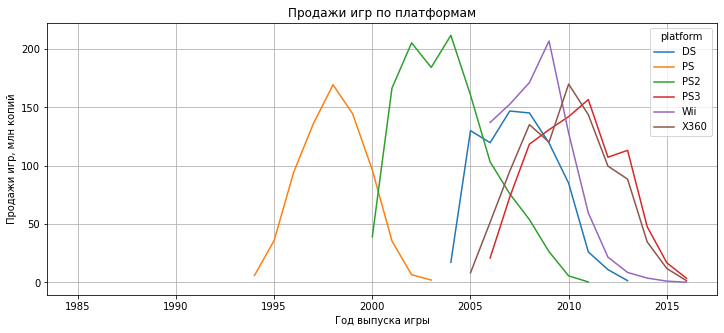

In [22]:
df.query('platform in @ top_6_sales.index').pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска игры'), plt.ylabel('Продажи игр, млн копий')
plt.show()

- У самых продаваемых платформ "срок жизни" составляет около 10 лет. Проверим это расчетами.

In [23]:
# минимально значимые продажи в миллионах:
min_sales = 5
# суммарные продажи в год по платформам выше порога:
res = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).query('total_sales > @min_sales')
# среднее число лет выше порога
res.reset_index().query('platform in @ top_6_sales.index').groupby('platform').agg({'year_of_release':'nunique'}).mean()

year_of_release    9.666667
dtype: float64

- Как видим "срок жизни" у топовых платформ в среднем составляет 9,7 лет.

Сравним этот показатель со средним сроком существования всех платформ:

In [24]:
# минимально значимые продажи в миллионах:
min_sales = 5
# суммарные продажи в год по платформам выше порога:
res = df.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).query('total_sales > @min_sales')
# среднее число лет выше порога
res.reset_index().groupby('platform').agg({'year_of_release':'nunique'}).mean()

year_of_release    6.916667
dtype: float64

- Срок жизни у топовых платформ в среднем почти на 3 года больше.

### Актуальный период

В результате исследования первых двух вопросов можно сделать вывод, что актуальным для построения прогноза является период 3-4 года (с 2013 года по 2016 год) - в этот период укладывается половина среднего срока жизни платформ, а значит низка вероятность захватить уже отжившие тренды.

Для дальнейшего исследования возьмем данные только за этот период.

In [25]:
# сделаем срез исходного датафрейма по году выпуска игр за период с 2007 по 2016 годы:
df_actual = df.query('2013 <= year_of_release <= 2016')
# проверим, правильные ли года включены в новый датафрейм:
df_actual['year_of_release'].sort_values().unique()

array([2013, 2014, 2015, 2016])

### Потенциально прибыльные платформы

Чтобы выбрать потенциально прибыльные платформы, изучим, какие платформы лидируют по продажам, растут они или падают.

Посмотрим, какие платформы лидируют по продажам. Для этого сгруппируем данные по названию платформы и посчитаем суммарные продажи. Выведем данные в порядке убывания.

In [26]:
(
    df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


- По суммарным продажам лидируют платформы: PS4, PS3, XOne.

Посмотрим, как обстоят дела с продажами в 2016 году:

In [27]:
(
    df_actual.query('year_of_release == 2016')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,total_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


- Здесь ситуация несколько другая. PS3 находилась в лидерах по суммарным продажам за 4 года. В 2016 году эта платформа находятся в хвосте списка по продажам. Возможно она уже отжила свое время.

Проверим это на графике.

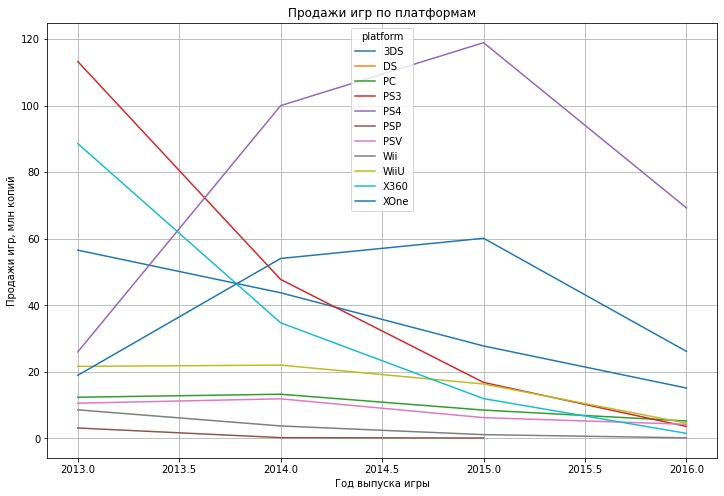

In [28]:
df_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(12, 8))
plt.title('Продажи игр по платформам')
plt.xlabel('Год выпуска игры'), plt.ylabel('Продажи игр, млн копий')
plt.show()

- По графику видим, что у платформы PS3 действительно наблюдается падение продаж на протяжении последних 4-х лет, и в 2016 году продажи не достигают 5 миллионов копий. Можно считать, что данная платформа уже заканчивает свой срок существования.
- Платформы PS4 и XOne находятся на рынке сравнительно недавно - около 4-х лет. Они же находятся в лидерах по продажам в 2016 году. Отметим, что продажи этих платформ за последний год упали, но падение продаж отмечается и у всех остальных платформ. Возможно, что в датафрейме представлены продажи не за весь 2016 год.
- Из тройки лидеров по продажам в 2016 году можно обратить внимание на платформу 3DS. На графике видим, что продажи этой платформы тоже падают последние 4 года. Скорее всего платформа 3DS уйдет с рынка в течение ближайшего года.
- Таким образом, потенциально прибыльными  платформами на 2017 год можно признать платформы PS4 и XOne. 
- Не стоит сбрасывать со счетов PC. Игры на компьютеры будут выходить всегда, хоть и пользуются меньшей популярностью, чем приставка. Ранее на графиках, начиная с 1993-1994 годов, мы видели постоянные продажи игр на PC, хотя и в меньших количествах, чем на других платформах.

### График "ящик с усами" по продажам в разбивке по платформам

Посроим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

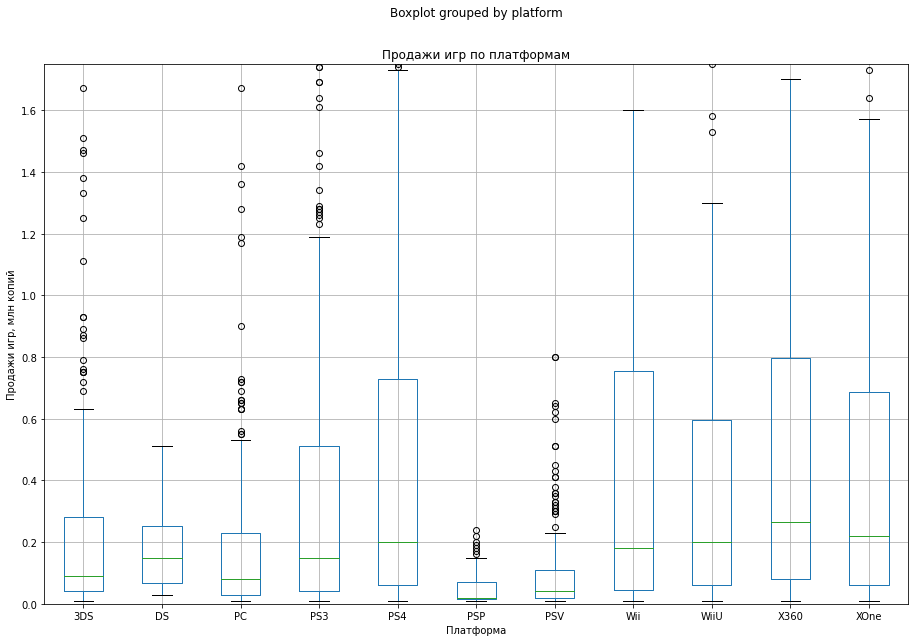

In [29]:
df_actual.boxplot(column='total_sales', by='platform', figsize=(15, 10))
plt.ylim(0, 1.75)
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа'), plt.ylabel('Продажи игр, млн копий')
plt.show()

- По графику «ящик с усами» практически на всех платформах видим, что медиана смещена в меньшую сторону от среднего. Это говорит о том, что на рынке присутствуют популярные  игры с довольно крупными продажами, которые тянут за собой среднее значение.
- Обратим внимание на медианные продажи. Самые высокие продажи у игр на платформе X360. Это вполне закономерно, так как длительное время эта платформа находилась в топе. Но как мы помним, период существования этой платформы подходит к концу.
- Если посмотреть на потенциально прибыльные платформы PS4, XOne и 3DS, медианы на платформах XOne и PS4 выше, а значит они более прибыльны. У платформы 3DS медиана значительно ниже и межквартильный размах меньше. Платформу 3DS вряд ли можно отнести к перспективным.

### Корреляция между отзывами и продажами

Изучим, как влияют на продажи перспективных платформ отзывы пользователей и критиков.

Для этого построим диагараммы рассеяния и посчитаем корреляцию между отзывами и продажами.

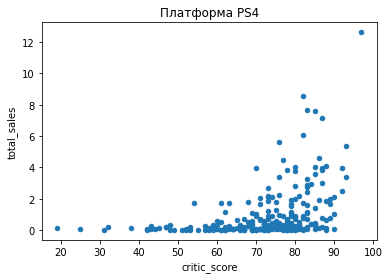

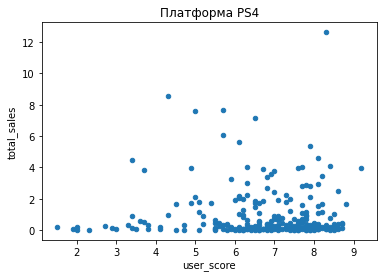

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


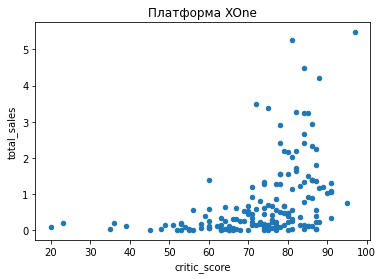

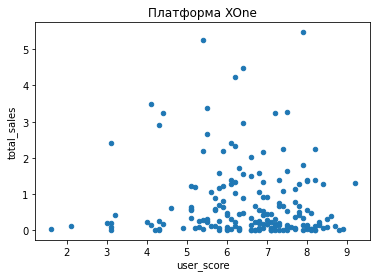

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


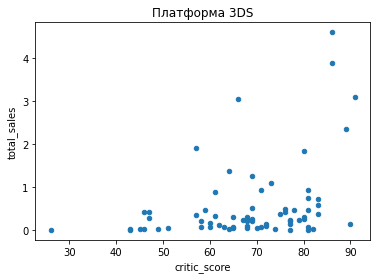

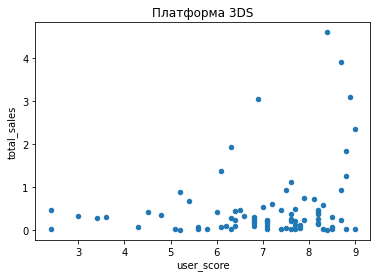

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


In [30]:
# создадим список потенциально прибыльных платформ:
promising_platform = ['PS4', 'XOne', '3DS']
# построим диаграммы рассеяния и посчитаем корреляцию:
for value in promising_platform:
    df_actual.query('platform == @value').plot(x='critic_score', y='total_sales', kind='scatter')
    plt.title(f'Платформа {value}')
    plt.show()
    df_actual.query('platform == @value').plot(x='user_score', y='total_sales', kind='scatter')
    plt.title(f'Платформа {value}')
    plt.show()
    display(df_actual.query('platform == @value')[['total_sales', 'critic_score', 'user_score']].corr())

- На рассмотренных нами платформах наблюдается умеренная связь между оценками критиков и продажами. Между оценками пользователей и продажами связь практически слабая или практически отсутствует.

### Распределение игр по жанрам

Посмотрим на общее распределение игр по жанрам.

In [31]:
df_actual['genre'].value_counts()

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

- По количеству игр лидируют жанры: Action (с большим отрывом от других жанров), Role-Playing, Adventure.

Изучим распределение жанров по прибыльности:

Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.

In [32]:
(
    df_actual.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


- Тройка лидеров по количеству игр не являются самыми прибыльными жанрами.
- Наиболее прибыльные жанры - Shooter, Sports, Misc. Наименее - Adventure, Puzzle, Simulation.

**Выводы:**
- До 1995 года игр выпускалось очень мало, их количество не достигало 100 в год. С 1995 года наблюдается рост производства игр, после 2000 года довольно интенсивный, с максимумом более 1400 игр в 2008-2009 годах. Затем отмечается снижение показателя, и к 2016 году количество выпущенных игр достигает отметки около 500.
- Продажи до 1995 года были также невелики. С 1995 года на некоторых платформах наблюдается резкий скачок продаж, в то время как на других платформах продажи остаются сравнительно небольшими.
- Все платформы имеют определенный "срок жизни": они появляются, достигают своего максимума по продажам и со временем исчезают с рынка. Топовые платформы живут в среднем 9,7 лет, что почти на 3 года дольше по сравнению с остальными платформами. На основе этого выделили актуальный для исследования период в 4 года (с 2013 по 2016 годы). Для дальнейшего исследования использовали данные только за актуальный период.
- По суммарным продажам лидируют платформы: PS4, PS3, XOne. Кроме того и медианный показатель у платформ PS4 и XOne выше, чем у прочих платформ, что подтверждает, что платформы показали себя очень хорошо за выбранный период. Если смотреть продажи PS3 только за 2016 год, то эта платформа находятся в хвосте списка, а на графике видим, что продажи ее постоянно падают на протяжении последниех 4-х лет. Можно считать, что платформа PS3 уже заканчивает свой срок существования.
- Платформы PS4 и XOne находятся на рынке сравнительно недавно - около 4-х лет. Они же находятся в лидерах по продажам в 2016 году. Продажи этих платформ за последний год упали, но падение продаж отмечается и у всех остальных платформ, что связано вероятно с неполными данными за 2016 год.
- В тройку лидеров по продажам в 2016 году входит также платформа 3DS. Но период существования этой платформы на данный момент составляет уже 6 лет. А так как срок жизни нетоповых платформ находится в районе 6,8 лет, скорее всего она уйдет с рынка в течение ближайшего года. Кроме того, медиана у данной платформы находится весьма ниже и межквартильный размах меньше, а значит и прибыльность скромнее, чем у PS4 и XOne.
- Наблюдается умеренная связь между оценками критиков и продажами. Между оценками пользователей и продажами связь практически отсутствует.
- По количеству игр лидируют жанры: Action (с большим отрывом от других жанров), Role-Playing, Adventure. Наиболее прибыльные жанры - Shooter, Sports, Misc. Топовые жанры по количеству игр и по прибыльности не совпадают.

## Портрет пользователя по регионам

**Этапы:**

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Выясним, влияет ли рейтинг ESRB на продажи в отдельном регионе.

### Популярные платформы

Сравним самые популярные платформы в трех регионах: Северной Америке, Европе и Японии.

In [33]:
# создадим список с продажами по регионам:
regions = ['na_sales', 'eu_sales','jp_sales']
# выведем 5 самых популярных платформ по регионам:
for value in regions:
   (
        display(df_actual.pivot_table(index='platform', values=value, aggfunc='sum')
        .sort_values(by=value, ascending=False)
        .head(5))
    )

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


- Набор топовых платформ в Северной Америке и Европе одинаков. В топе присутствуют платформы XOne и X360, отсутствующие в топе Японии.
- В Японии самой популярной платформой оказалась 3DS, а также в топ попали платформы PSV и WiiU, котрых нет в топах Европы и Северной Америки.
- PS4, 3DS и PS3 - присутствуют в топовом рейтинге во всех трех регионах.

### Популярные жанры

Сравним самые популярные жанры игр в тех же регионах:

In [34]:
# выведем 5 самых популярных жанров по регионам:
for value in regions:
   (
        display(df_actual.pivot_table(index='genre', values=value, aggfunc='sum')
        .sort_values(by=value, ascending=False)
        .head(5))
    )

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


- Как видим, по популярным жанрам Япония тоже отличается от Северной Америки и Европы. Японцы предпочитают несколько другой набор игр.

Изучим топы игр по прибыльности.

In [35]:
# выведем 5 самых прибыльных жанров по регионам:
for value in regions:
   (
        display(df_actual.pivot_table(index='genre', values=value, aggfunc='median')
        .sort_values(by=value, ascending=False)
        .head(5))
    )

,na_sales
genre,
Shooter,0.200
Platform,0.090
Sports,0.080
Fighting,0.045
Racing,0.030


,eu_sales
genre,
Shooter,0.190
Platform,0.080
Racing,0.060
Sports,0.050
Simulation,0.035


,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Puzzle,0.02
Action,0.01


- В топе жанров по прибыльности у Японии также набор, отличный от других регионов.

### Влияние рейтинга ESRB на продажи

Изучим влияние рейтинга ESRB на продажи в отдельном регионе.

Для начала посмотрим игры с какими рейтингами являются самыми продаваемыми по регионам:

In [36]:
for value in regions:
   (
        display(df_actual.pivot_table(index='rating', values=value, aggfunc='sum')
        .sort_values(by=value, ascending=False))
    )

,na_sales
rating,
M,165.21
нет_рейтинга,89.42
E,79.05
E10+,54.24
T,49.79


,eu_sales
rating,
M,145.32
E,83.36
нет_рейтинга,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
нет_рейтинга,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


- Наиболее продаваемые в Северной Америке и Европе - игры с рейтингом М ("для взрослых").
- В Японии игры для подростков находятся на втором месте по продажам после игр без рейтинга.

Чтобы изучить изучить влияние рейтинга на продажи, построим "ящик с усами" и оценим медианы у каждого рейтинга в разных регионах.

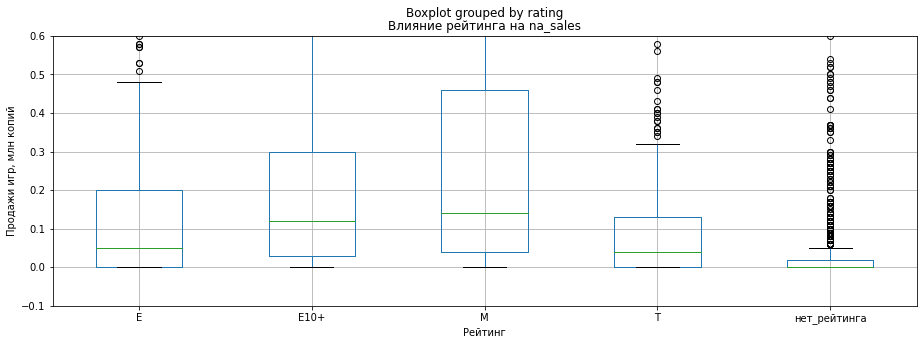

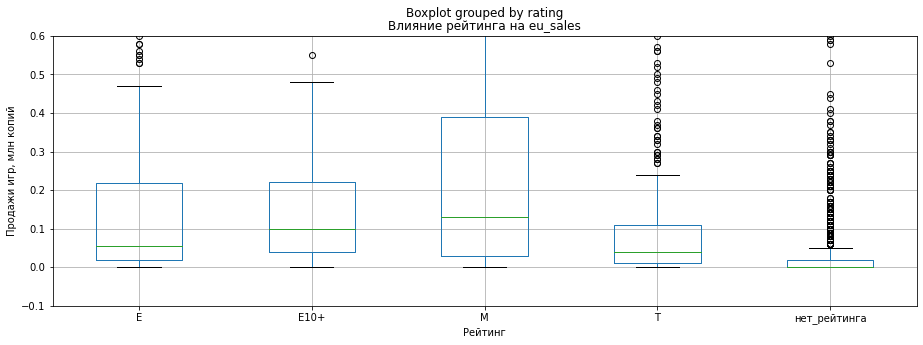

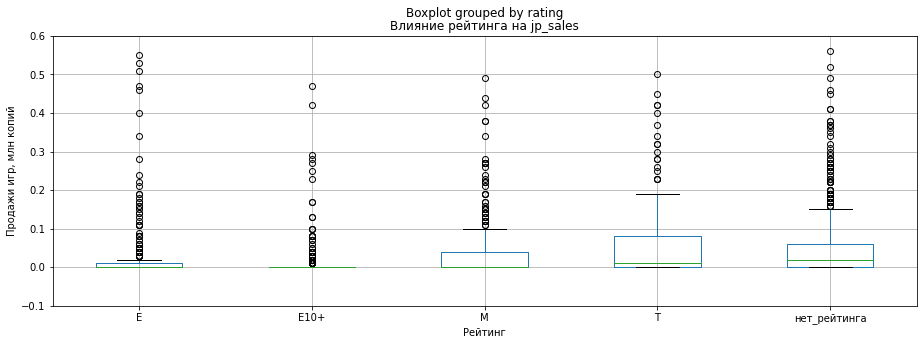

In [37]:
for value in regions:
    df_actual.boxplot(column=value, by='rating', figsize=(15, 5))
    plt.ylim(-0.1, 0.6)
    plt.title(f'Влияние рейтинга на {value}')
    plt.xlabel('Рейтинг'), plt.ylabel('Продажи игр, млн копий')
    plt.show()

- В Севеной Америке и Европе игры с отсутствием возрастного рейтинга продаются значительно хуже игр с определенным рейтингом.
- В Японии отсутствие рейтинга не влияет на продажи.

**Выводы:**

В ходе исследования мы составили портрет пользователя следующих регионов: Северной Америки, Европы и Японии.

- Набор топовых платформ в Северной Америке и Европе одинаков - это PS4, XOne, X360, PS3 и 3DS. А вот в Японии самой популярной платформой оказалась 3DS, а также в топ попали платформы PSV и WiiU, котрых нет в топах Европы и Северной Америки. PS4, 3DS и PS3 - присутствуют в топовом рейтинге во всех трех регионах.
- В топах всех регионов присутствуют жанры Action, Shooter, Role-Playing. В предпочтения японцев попал жанр Fighting, который отсутствует в топе других регионов.
- Самые прибыльныеи жанры в Северной Америке и Европе - Shooter, Platform, Racing, Sports. В Японии набор отличается - Role-Playing, Fighting, Misc.	
- Наиболее продаваемые в Северной Америке и Европе - игры с рейтингом М ("для взрослых"). В Японии игры для подростков находятся на втором месте по продажам после игр без рейтинга.
- Наибольшее влияние рейтинга на продажи наблюдается в Северной Америке. В Японии отсутствие рейтинга не влияет на продажи.

## Проверка гипотез

Сфрмулируем исследовательские гипотезы:
- Средние пользовательские рейтинги платформ XOne и РС одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Для исследования гипотез избавимся от пропусков в столбце с рейтингами пользователей:

In [38]:
df_actual = df_actual.dropna(subset=['user_score'])

### Сравнение рейтингов платформ

Посчитаем среднее, медиану, дисперсию рейтингов по платформам:

In [39]:
df_actual.pivot_table(
    index = 'platform', 
    values='user_score',
    aggfunc=['min', 'max', 'mean', 'median', np.var, np.std]
).style.format('{:.2f}')

,min,max,mean,median,var,std
,user_score,user_score,user_score,user_score,user_score,user_score
platform,,,,,,
3DS,2.40,9.00,6.98,7.30,2.37,1.54
DS,4.80,4.80,4.80,4.80,nan,nan
PC,1.40,9.30,6.27,6.80,3.04,1.74
PS3,0.20,9.10,6.35,6.90,3.23,1.80
PS4,1.50,9.20,6.75,7.00,2.13,1.46
PSP,3.40,8.30,5.85,5.85,12.01,3.46
PSV,1.80,9.30,7.53,7.80,1.75,1.32
Wii,2.80,8.40,5.26,4.30,3.59,1.90


- Сравним показатели по платформам XOne и РС. Средние оценки PC меньше. Дисперсии отличаются.

Сформулируем статистические гипотезы:

- Н0: средние пользовательские рейтинги платформ XOne и РС равны;
- Н1: средние пользовательские рейтинги платформ XOne и РС не равны (двусторонняя гипотеза).

Для проверки гипотезы о равенстве средних пользовательских рейтингов платформ XOne и РС используем метод .ttest_ind. Зададим критический уровень статистической значимости равный 5 %.

In [40]:
# зададим пороговое значение alpha, равное 5 %:
alpha = .05

# проведем t-тест на равенство средних двух выборок:
score_mean_compare_platform = st.ttest_ind(df_actual.query('platform == "XOne"')['user_score'], df_actual.query('platform == "PC"')['user_score'], equal_var=False)

# рассчитаем p-value - вероятность получить наблюдаемый или еще более далекий от предполагаемого
# результат при условии, что Н0 верна:
p_value_score_mean_compare_platform = score_mean_compare_platform.pvalue

# выведем на экран значение p-value:
print('p-значение:', score_mean_compare_platform.pvalue)

# сравним p-value с пороговым значением alpha:
if p_value_score_mean_compare_platform < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу.


- Значение p-value равно 14,8 %. Это значит, что вероятность равенства средних пользовательских рейтингов платформ XOne и РС присутствует. Отвергнуть нулевую гипотезу не получилось.

### Сравнение рейтингов жанров

Посчитаем среднее, медиану, дисперсию рейтингов по жанрам:

In [41]:
df_actual.pivot_table(
    index = 'genre', 
    values='user_score',
    aggfunc=['min', 'max', 'mean', 'median', np.var, np.std]
).style.format('{:.2f}')

,min,max,mean,median,var,std
,user_score,user_score,user_score,user_score,user_score,user_score
genre,,,,,,
Action,2.00,9.10,6.84,7.10,1.77,1.33
Adventure,2.90,9.30,7.46,7.50,1.69,1.30
Fighting,2.90,8.70,7.04,7.50,1.92,1.39
Misc,4.10,8.70,6.97,7.00,1.41,1.19
Platform,2.90,9.00,6.71,7.10,2.89,1.70
Puzzle,6.20,8.60,7.47,7.50,0.89,0.94
Racing,1.00,9.10,6.08,6.20,2.99,1.73
Role-Playing,1.40,9.30,7.38,7.60,1.49,1.22


Сравним показатели по жанрам Action и Sports. Средние оценки и медиана у жанра Sports меньше. Дисперсии у этих жанров отличаются.

Сформулируем статистические гипотезы:

- Н0: средние пользовательские рейтинги жанров Action и Sports равны;
- Н1: средние пользовательские рейтинги жанров Action и Sports не равны; (двусторонняя гипотеза).

Для проверки гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports используем метод .ttest_ind. Зададим критический уровень статистической значимости равный 5 %.

In [42]:
# зададим пороговое значение alpha, равное 5 %:
alpha = .05

# проведем t-тест на равенство средних двух выборок:
score_mean_compare_genre = st.ttest_ind(df_actual.query('genre == "Action"')['user_score'], df_actual.query('genre == "Sports"')['user_score'], equal_var=False)

# рассчитаем p-value - вероятность получить наблюдаемый или еще более далекий от предполагаемого
# результат при условии, что Н0 верна:
p_value_score_mean_compare_genre = score_mean_compare_genre.pvalue

# выведем на экран значение p-value:
print('p-значение:', '{:.20f}'.format(float(p_value_score_mean_compare_genre)))

# сравним p-value с пороговым значением alpha:
if p_value_score_mean_compare_genre < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.00000000000000000001
Отвергаем нулевую гипотезу.


- По значению p-value видим, что вероятность равенства средних пользовательских рейтингов жанров Action и Sports критически мала. Нулевую гипотезу отвергаем и принимаем альтернативную гипотезу, а именно: "cредние пользовательские рейтинги жанров Action и Sports не равны".

**Выводы:**

На данном этапе мы исследовали две гипотезы:

- средние пользовательские рейтинги платформ XOne и РС одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.
Для каждой исследовательской гипотезы мы сформулировали по две статистические гипотезы: нулевую и альтернативную.

Для проверки гипотез мы использовали метод .ttest_ind. Так как дисперсии у выборок разные, в параметрах указали equal_var=False. Задали критический уровень статистической значимости (alpha) равный 5 %. Рассчитали p-value - вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что Н0 верна. Сравнили p-value со значением alpha.

Сделали следующие выводы:

- гипотезу о равенстве средних пользовательских рейтингов платформ XOne и РС отвергнуть не получилось, так как значение p-value равно 14,8%;
- гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports мы отвергли, так как значение p-value близко к 0.

## Общий вывод

В процессе работы перед нами стояла задача изучить данные о продажах игр и выявить определяющие успешность игры закономерности, что позволило бы сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

На этапе подготовки данных мы исправили обнаруженные в них ошибки и недочеты, сделали дополнительные расчеты.
1. Привели названия столбцов к нижнему регистру в соответствии с хорошим стилем;
2. Обработали пропуски в данных, а также исправили типы данных в некоторых столбцах.
- Строки с пропусками в столбце year_of_release  (год выпуска игры) удалили без риска исказить результаты исследования, так как пропуски составляли лишь 1,6 % от общего объема данных. Значения в столбце привели к типу данных "int".
- Удалили строки с пропусками в названиях жанров (их всего два).
- Пропуски в оценках критиков и пользователей оставили без изменений, так как скорее всего оценки просто отсутствуют.
- В столбце с оценками пользователей аббревиатуру "tbd" - "подлежит определению" - заменили на "NaN" и привели значения к типу данных "float64".
- В столбце с возрастными рейтингами пропуски заменили на значение "нет_рейтинга".
3. Добавили столбец с суммарными продажами во всех регионах.


В ходе исследовательского анализа данных мы изучили данные о продажах игр с 1980 по 2016 годы.

Отметили следующие моменты:
- до 1995 года игр выпускалось очень мало и продажи были невелики. С 1995 года наблюдается рост производства игр и рост продаж. Последние годы наблюдается тенденция к снижению количества выпускаемых игр и объема продаж, соответственно;
- все платформы имеют определенный "срок жизни": они появляются, достигают своего максимума по продажам и со временем исчезают с рынка;
- топовые платформы живут в среднем 9,7 лет, что почти на 3 года дольше по сравнению с остальными платформами. На основе этого выделили актуальный для исследования период в 4 года лет (с 2013 по 2016 годы), который и использовали для дальнейшего анализа.


Чтобы выбрать потенциально прибыльные платформы, изучили, какие платформы лидируют по продажам, растут они или падают. Исследовали распределение игр по жанрам. Составили портрет пользователей по регионам.

Сделали следующие выводы:
- по суммарным продажам лидируют платформы: PS4, PS3, XOne. Однако у платформы PS3 действительно наблюдается падение продаж на протяжении последних 4-х лет, и в 2016 году продажи не достигают 5 миллионов копий. Можно считать, что данная платформа уже заканчивает свой срок существования.
- платформы PS4 и XOne находятся на рынке сравнительно недавно - около 4-х лет. Они же находятся в лидерах по продажам в 2016 году. Именно эти платформы можно оценить потенциально прибыльными на 2017 год;
- игры на компьютеры имеют постоянные, хоть и сравнительно не очень большие продажи, начиная с 1994 года. На них тоже следует обратить внимание;
- изучив влияние отзывов на продажи выбранных нами перспективных платформ, мы отметили умеренную связь между оценками критиков и продажами. Между оценками пользователей и продажами связь практически отсутствует;
- по количеству выпущенных игр лидируют жанры: Action (с большим отрывом от других жанров), Role-Playing, Adventure. Наиболее прибыльные жанры - Shooter, Sports, Misc. Наименее - Adventure, Puzzle, Simulation.
- предпочтения пользователей Японии по платформам отличаются от пользователей Северной Америки и Европы. Тем не менее, платформы PS4, 3DS и PS3 присутствуют в топовом рейтинге во всех трех регионах;
- самые прибыльные жанры в Северной Америке и Европе - Shooter, Platform, Racing, Sports. В Японии набор отличается - Role-Playing, Fighting, Misc;
- наиболее продаваемые в Северной Америке и Европе - игры с рейтингом М ("для взрослых"). В Японии игры для подростков находятся на втором месте по продажам после игр без рейтинга.

Исследовали две гипотезы:
- средние пользовательские рейтинги платформ XOne и РС одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Для каждой исследовательской гипотезы мы сформулировали по две статистические гипотезы: нулевую и альтернативную.

В результате исследования гипотез:
- гипотезу о равенстве средних пользовательских рейтингов платформ XOne и РС отвергнуть не получилось, так как значение p-value равно 14,8%;
- гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports мы отвергли, так как значение p-value близко к 0.